In [1]:
import xarray as xr
from xcube.core.geocoded import reproject_dataset

In [2]:
src_ds = xr.open_dataset('../../../xcube-gen-bc/test/inputdata/O_L2_0001_SNS_2017104102450_v1.0.nc')
src_ds

<xarray.Dataset>
Dimensions:              (tp_x: 20, tp_y: 102, x: 100, y: 100)
Coordinates:
    lat                  (y, x) float64 ...
    lon                  (y, x) float64 ...
Dimensions without coordinates: tp_x, tp_y, x, y
Data variables:
    pixel_classif_flags  (y, x) int16 ...
    quality_flags        (y, x) uint32 ...
    rtoa_1               (y, x) float32 ...
    rtoa_2               (y, x) float32 ...
    rtoa_3               (y, x) float32 ...
    rtoa_4               (y, x) float32 ...
    rtoa_5               (y, x) float32 ...
    rtoa_6               (y, x) float32 ...
    rtoa_7               (y, x) float32 ...
    rtoa_8               (y, x) float32 ...
    rtoa_9               (y, x) float32 ...
    rtoa_10              (y, x) float32 ...
    rtoa_11              (y, x) float32 ...
    rtoa_12              (y, x) float32 ...
    rtoa_13              (y, x) float32 ...
    rtoa_14              (y, x) float32 ...
    rtoa_15              (y, x) float32 ...
    rtoa_16              (y, x) float32 ...
    rtoa_17              (y, x) float32 ...
    rtoa_18              (y, x) float32 ...
    rtoa_19              (y, x) float32 ...
    rtoa_20              (y, x) float32 ...
    rtoa_21              (y, x) float32 ...
    rrs_1                (y, x) float32 ...
    rrs_2                (y, x) float32 ...
    rrs_3                (y, x) float32 ...
    rrs_4                (y, x) float32 ...
    rrs_5                (y, x) float32 ...
    rrs_6                (y, x) float32 ...
    rrs_7                (y, x) float32 ...
    rrs_8                (y, x) float32 ...
    rrs_9                (y, x) float32 ...
    rrs_10               (y, x) float32 ...
    rrs_11               (y, x) float32 ...
    rrs_12               (y, x) float32 ...
    rrs_16               (y, x) float32 ...
    rrs_17               (y, x) float32 ...
    rrs_18               (y, x) float32 ...
    rrs_21               (y, x) float32 ...
    kd489                (y, x) float32 ...
    kdmin                (y, x) float32 ...
    kd_z90max            (y, x) float32 ...
    conc_tsm             (y, x) float32 ...
    conc_chl             (y, x) float32 ...
    c2rcc_flags          (y, x) uint32 ...
    Bbp_443              (y, x) float32 ...
    TP_latitude          (tp_y, tp_x) float32 ...
    TP_longitude         (tp_y, tp_x) float32 ...
    OAA                  (tp_y, tp_x) float32 ...
    OZA                  (tp_y, tp_x) float32 ...
    SAA                  (tp_y, tp_x) float32 ...
    SZA                  (tp_y, tp_x) float32 ...
    humidity             (tp_y, tp_x) float32 ...
    sea_level_pressure   (tp_y, tp_x) float32 ...
Attributes:
    Conventions:           CF-1.4
    TileSize:              128:1142
    product_type:          C2RCC_OLCI
    metadata_profile:      beam
    metadata_version:      0.5
    auto_grouping:         iop:conc:rtoa:rrs:rhown:kd:unc
    tiepoint_coordinates:  TP_longitude TP_latitude
    start_date:            14-APR-2017 10:27:29.454657
    stop_date:             14-APR-2017 10:27:50.183264

In [3]:
src_ds.rtoa_8.plot.imshow(figsize=(16,16))

In [4]:
dst_ds = reproject_dataset(src_ds, var_names='rtoa_8')

In [5]:
dst_ds

<xarray.Dataset>
Dimensions:  (lat: 160, lon: 250)
Coordinates:
  * lon      (lon) float64 1.152 1.154 1.156 1.158 ... 1.632 1.634 1.636 1.638
  * lat      (lat) float64 52.33 52.33 52.33 52.34 ... 52.63 52.64 52.64 52.64
Data variables:
    rtoa_8   (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan
Attributes:
    Conventions:           CF-1.4
    TileSize:              128:1142
    product_type:          C2RCC_OLCI
    metadata_profile:      beam
    metadata_version:      0.5
    auto_grouping:         iop:conc:rtoa:rrs:rhown:kd:unc
    tiepoint_coordinates:  TP_longitude TP_latitude
    start_date:            14-APR-2017 10:27:29.454657
    stop_date:             14-APR-2017 10:27:50.183264

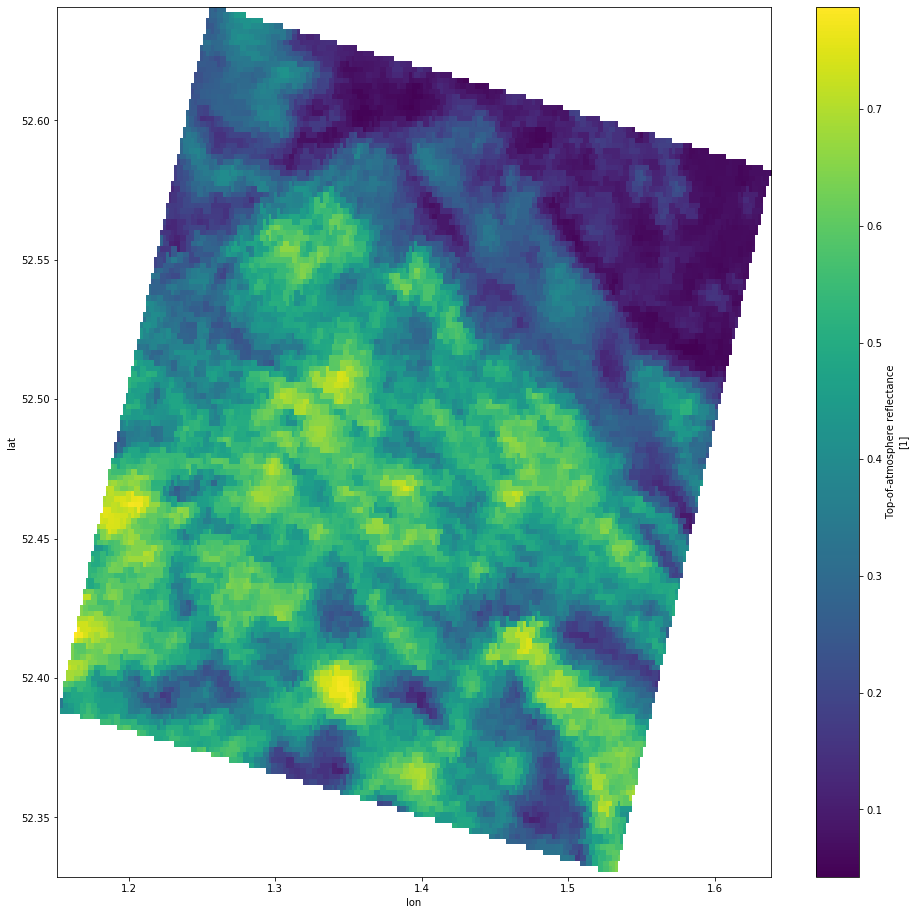

In [6]:
dst_ds.rtoa_8.plot.imshow(figsize=(16,16))

In [7]:
import numpy as np

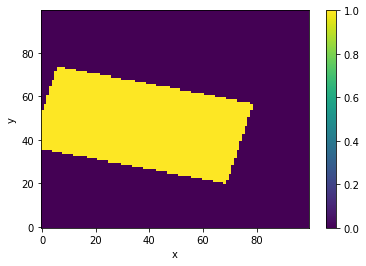

In [20]:
bbox = np.logical_and(np.logical_and(src_ds.lon >= 1.2, src_ds.lon <= 1.5), np.logical_and(src_ds.lat > 52.45, src_ds.lat < 52.55))
bbox.plot.imshow(vmin=0, vmax=1)

In [16]:
x = src_ds.x.where(bbox)
y = src_ds.y.where(bbox)

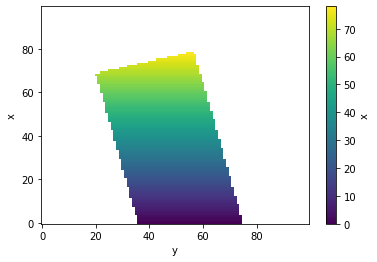

In [24]:
x.plot.imshow()

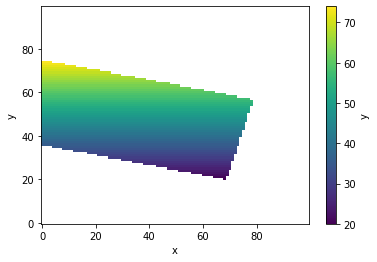

In [25]:
y.plot.imshow()

In [21]:
x1 = int(x.min())
x2 = int(x.max())
y1 = int(y.min())
y2 = int(y.max())

In [22]:
x1, y1, x2, y2

(0, 20, 78, 74)

In [26]:
var = src_ds.rtoa_8.isel(x=slice(x1, x2 + 1), y=slice(y1, y2 + 1))

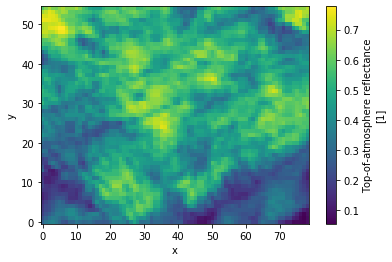

In [29]:
var.plot.imshow()

In [30]:
var.name

'rtoa_8'